In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Notebook to do time series analysis on crime in San Francisco from 2003 - 2017


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [13]:
# Import data, using parse_dates to turn Date column into datetime object
# https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates
df = pd.read_csv('../../Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', parse_dates=['Date'])

# Show all columns of dataframe
pd.set_option('display.max_columns', None)

In [27]:
# Keep key columns and sort
data = df[['Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'X', 'Y', 'PdDistrict', 'Resolution']]
data = (
    data.dropna()
    .sort_values(by='Date')
)

In [30]:
data.head()

,Category,Descript,DayOfWeek,Date,Time,X,Y,PdDistrict,Resolution
1164161,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01,02:05,-122.406843,37.798059,CENTRAL,"ARREST, BOOKED"
1449954,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:30,-122.404592,37.790634,CENTRAL,NONE
533248,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,-122.418239,37.790933,CENTRAL,NONE
1474425,OTHER OFFENSES,OBSTRUCTIONS ON STREETS/SIDEWALKS,Wednesday,2003-01-01,16:55,-122.423619,37.771716,SOUTHERN,"ARREST, BOOKED"
767537,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,06:30,-122.432022,37.771202,NORTHERN,NONE


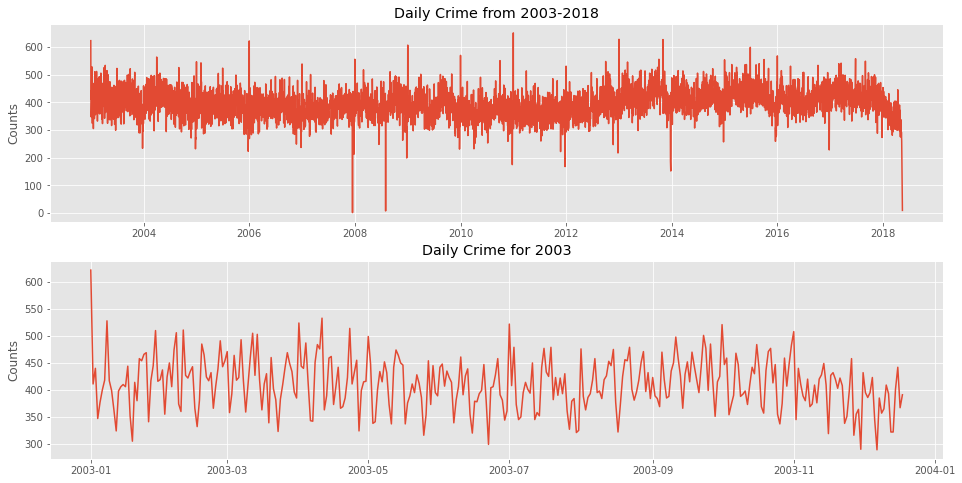

In [54]:
# Plot crimes
fig, axes = plt.subplots(2, 1, figsize=(16,8))
ax = axes[0]
ax.plot(data.groupby('Date').count()['Category'])
ax.set_title('Daily Crime from 2003-2018')
ax.set_ylabel('Counts')

ax = axes[1]
ax.plot(data.groupby('Date').count()['Category'].iloc[0:352])
ax.set_title('Daily Crime for 2003')
ax.set_ylabel('Counts')

plt.savefig('Crimetrends.png', bbox_inches='tight', dpi=350)